# CLASSIFICATION WITH KNN

**Đánh giá tham số k**
- Trong phần này, tiến hành cho k chạy từ 2 đến 10. Từ đó đánh giá độ chính xác dựa trên 2 tiêu chí accuracy và cross validation
- Dựa vào đó, chọn tham số k có độ chính xác cao nhất (trong project này k = 2)

**Training model**
- Sau khi chọn k thì tiến hành training model và test



In [11]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
from joblib import dump
import cv2
import pandas as pd

In [12]:
data_path = './data/data/'
model_path = data_path + "model"
data_training = np.load(data_path + 'training_data.npz')

images = data_training['images']
labels = data_training['labels']

images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [14]:
# Accuracy survey with k from 2 to 10
accuracies = []

for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(images_train, labels_train)
    predictions = knn.predict(images_val)
    accuracy = accuracy_score(labels_val, predictions)
    accuracies.append(accuracy)
    # print(f"k={k}, Accuracy: {accuracy}")

[0.5115062761506276, 0.47489539748953974, 0.4445606694560669, 0.46234309623430964, 0.4445606694560669, 0.44037656903765693, 0.4309623430962343, 0.4194560669456067, 0.41527196652719667]


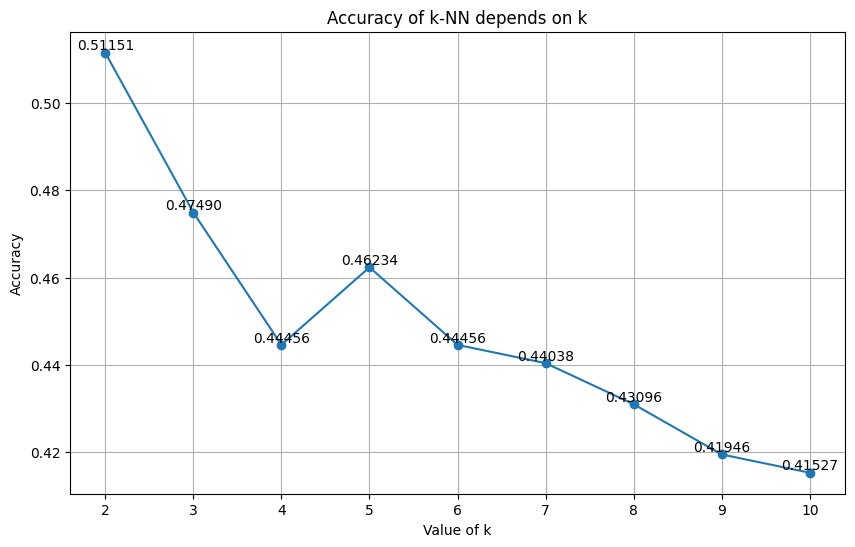

In [15]:
print(accuracies)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), accuracies, marker='o')
for i, acc in enumerate(accuracies):
    plt.text(i + 2, acc, f"{acc:.5f}", ha='center', va='bottom')

plt.title('Accuracy of k-NN depends on k')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [16]:
X = np.vstack((images_train, images_val))
y = np.concatenate((labels_train, labels_val))
n_folds = 5

mean_accuracies = []

for k in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Lấy điểm độ chính xác từ kiểm định chéo
    scores = cross_val_score(knn, X, y, cv=n_folds, scoring='accuracy')
    
    # Tính trung bình độ chính xác và thêm vào danh sách
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    # print(f"k={k}, Cross-validated Accuracy: {mean_accuracy}")

[0.4861924686192468, 0.4596234309623431, 0.42154811715481166, 0.4330543933054393, 0.42029288702928874, 0.41987447698744773, 0.4052301255230126, 0.39769874476987443, 0.38640167364016736]


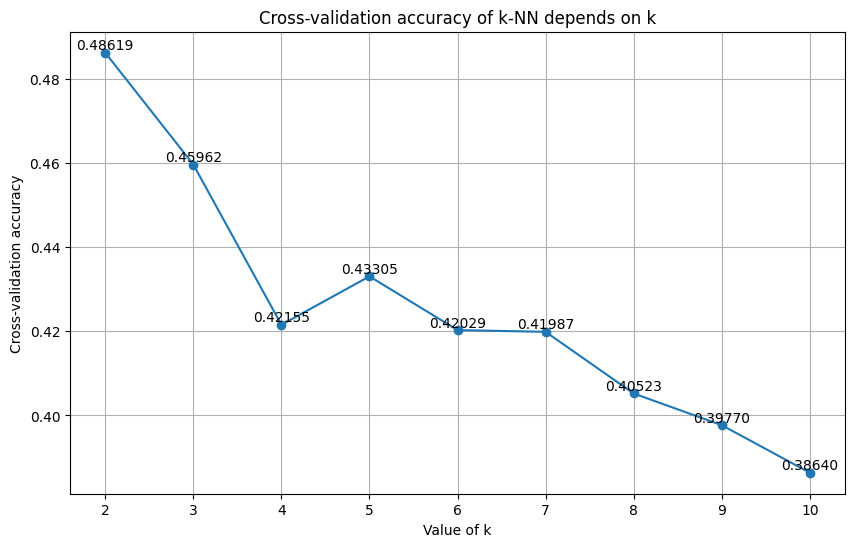

In [17]:
print(mean_accuracies)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), mean_accuracies, marker='o')

# Thêm giá trị độ chính xác tại mỗi điểm trên biểu đồ
for i, acc in enumerate(mean_accuracies):
    plt.text(i + 2, acc, f"{acc:.5f}", ha='center', va='bottom')

plt.title('Cross-validation accuracy of k-NN depends on k')
plt.xlabel('Value of k')
plt.ylabel('Cross-validation accuracy')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(images_train, labels_train)

dump(knn, model_path + '2nn_model.joblib')
print(f"Saved model to {model_path}2nn_model.joblib")

Saved model to ./data/data/model2nn_model.joblib


In [19]:
pre = knn.predict(images_val)
accuracy_score(labels_val, pre)

0.5115062761506276

In [24]:
def process_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is not None:
        img_resized = cv2.resize(img, (28, 28))
        _, optimal_thresh = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # cv2.imshow('image', optimal_thresh)
        # cv2.waitKey(0)  # Đợi cho đến khi một phím được nhấn
        # cv2.destroyAllWindows()

        return optimal_thresh.flatten()

In [20]:
label_unicode_path = data_path + "label_unicode.csv"

data = pd.read_csv(label_unicode_path)
label_unicode_dict = pd.Series(data.Unicode.values, index=data.Label).to_dict()

print(label_unicode_dict)

{1: 'U+4E00', 2: 'U+4E07', 3: 'U+4E0B', 4: 'U+4E8C', 5: 'U+4ECA', 6: 'U+56DB', 7: 'U+5973', 8: 'U+5B66', 9: 'U+5B89', 10: 'U+5C71', 11: 'U+5DE6', 12: 'U+5E74', 13: 'U+5E97', 14: 'U+5F8C', 15: 'U+624B', 16: 'U+65B0', 17: 'U+65E5', 18: 'U+66F8', 19: 'U+6765', 20: 'U+6BCD', 21: 'U+6BCE', 22: 'U+6C34', 23: 'U+706B', 24: 'U+767E', 25: 'U+793E', 26: 'U+7A7A', 27: 'U+8033', 28: 'U+82B1', 29: 'U+884C', 30: 'U+897F', 31: 'U+898B', 32: 'U+8A00', 33: 'U+8A9E', 34: 'U+8AAD', 35: 'U+8CB7', 36: 'U+8ECA', 37: 'U+9053', 38: 'U+9577', 39: 'U+9593', 40: 'U+96E8', 41: 'U+96FB', 42: 'U+98DF', 43: 'U+98F2', 44: 'U+99C5', 45: 'U+9AD8', 46: 'U+9B5A'}


In [28]:
knn = joblib.load(model_path + '2nn_model.joblib')

path = './test_image/3.jpg'

img = process_image(path)

predict = knn.predict([img])
print(predict, label_unicode_dict[predict[0]], chr(int(label_unicode_dict[predict[0]][2:], 16)))

image_path = cv2.imread(path)
cv2.imshow('image', image_path)
cv2.waitKey(0) 
cv2.destroyAllWindows()

[12] U+5E74 年
